## UCSV Multivariate

In [1]:
# 설치 없이 상태경로로 모듈을 가져오는 부분입니다
import sys
import os
parent_dir = os.path.abspath("../")
sys.path.append(parent_dir)

import bok_da

In [1]:
import bok_da

In [2]:
import pandas as pd
import numpy as np

In [3]:
# load data
dp_data = pd.read_csv("../data/ucsv_multivar_dp_data.csv", index_col=0, parse_dates=True)
dp_data

,DPCCRG_5,DFXARG_1,DNRGRG_6
QE,,,
1960-03-31,0.890472,0.983841,-4.310726
1960-06-30,1.664311,3.390526,3.473249
1960-09-30,1.613306,0.317101,5.825851
1960-12-31,1.211221,5.307922,0.068847
1961-03-31,0.615216,-0.760371,-1.759306
...,...,...,...
2014-06-30,1.882042,3.390564,5.008212
2014-09-30,1.212873,3.213802,-11.106417
2014-12-31,0.730385,2.131876,-44.515323


In [4]:
from bok_da.ts.ucsv import MultivarUCSV

# 테스트 설정입니다. 실제 사용시에는 충분한 수의 draws와 burnin을 설정해야 합니다.
model = MultivarUCSV(run_type="cython", verbose=True, n_draws=2000, n_burnin=500)
# model = bok_da.MultivarUCSV(run_type="cython", n_draws=2500, n_burnin=500, verbose=True)  # without_install 코드에서는 cython을 사용할 수 없습니다

> Loading Cython Module...
> Attempting to dynamically import: bok_da.ts.ucsv.ucsv_functions_cython_multivar...
> Cython Module Loaded.
> Initializing Model...
  - Run Type: cython
  - n_per_year: 4
  - n_draws: 2000
  - thinning: 10
  - n_burnin: 500
  - Verbose: True


In [5]:
model.fit(dp_data, columns=['DPCCRG', 'DFXARG', 'DNRGRG'])

> Start Fitting Model...
  - Input Data: 3 variables, 222 samples


  0%|          | 0/2000 [00:00<?, ?it/s]

100%|██████████| 2000/2000 [02:03<00:00, 16.23it/s]

> Model Fitted.


In [6]:
model.print_summary()

-------------------------------------------------------------
     Variable       Mean    Var      2.5     97.5     ESS    
-------------------------------------------------------------
 g_eps (common)   -0.0113  0.0668  -0.4273  0.4437  150.0000 
 g_eps (DPCCRG)   -0.0062  0.0077  -0.1703  0.1817  150.0000 
 g_eps (DFXARG)   -0.0128  0.1249  -0.5304  0.5201  150.0000 
 g_eps (DNRGRG)   -0.0208  0.3117  -0.7660  0.7490  150.0000 
 g_dtau (common)   0.0479  0.1615  -0.6198  0.5787  150.0000 
 g_dtau (DPCCRG)   0.0096  0.0096  -0.1732  0.1730  150.0000 
 g_dtau (DFXARG)   0.0128  0.0122  -0.2331  0.2561  109.7960 
 g_dtau (DNRGRG)   0.0011  0.1576  -0.6525  0.6258  150.0000 
 ps (common)       0.9677  0.0003   0.9306  0.9918   46.1136 
 ps (DPCCRG)       0.9595  0.0004   0.9156  0.9909   36.5061 
 ps (DFXARG)       0.9800  0.0001   0.9547  0.9952   90.9654 
 ps (DNRGRG)       0.9269  0.0017   0.8399  0.9815    7.6473 
-------------------------------------------------------------


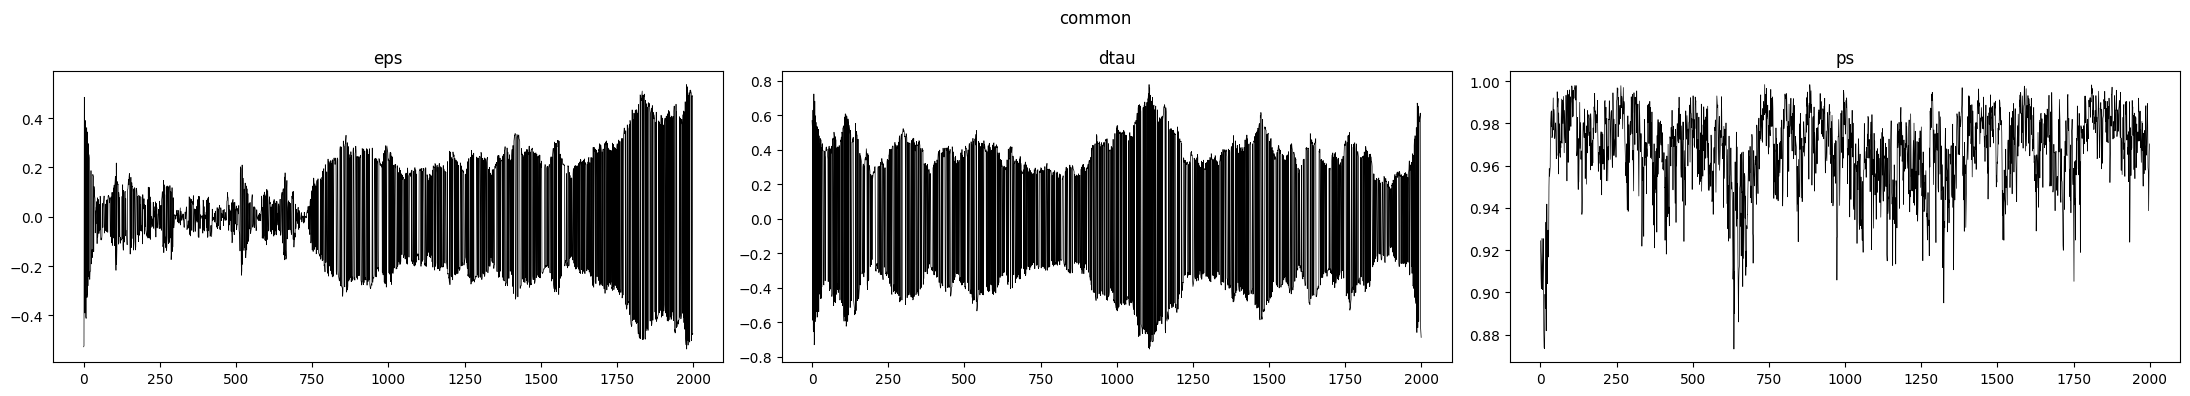

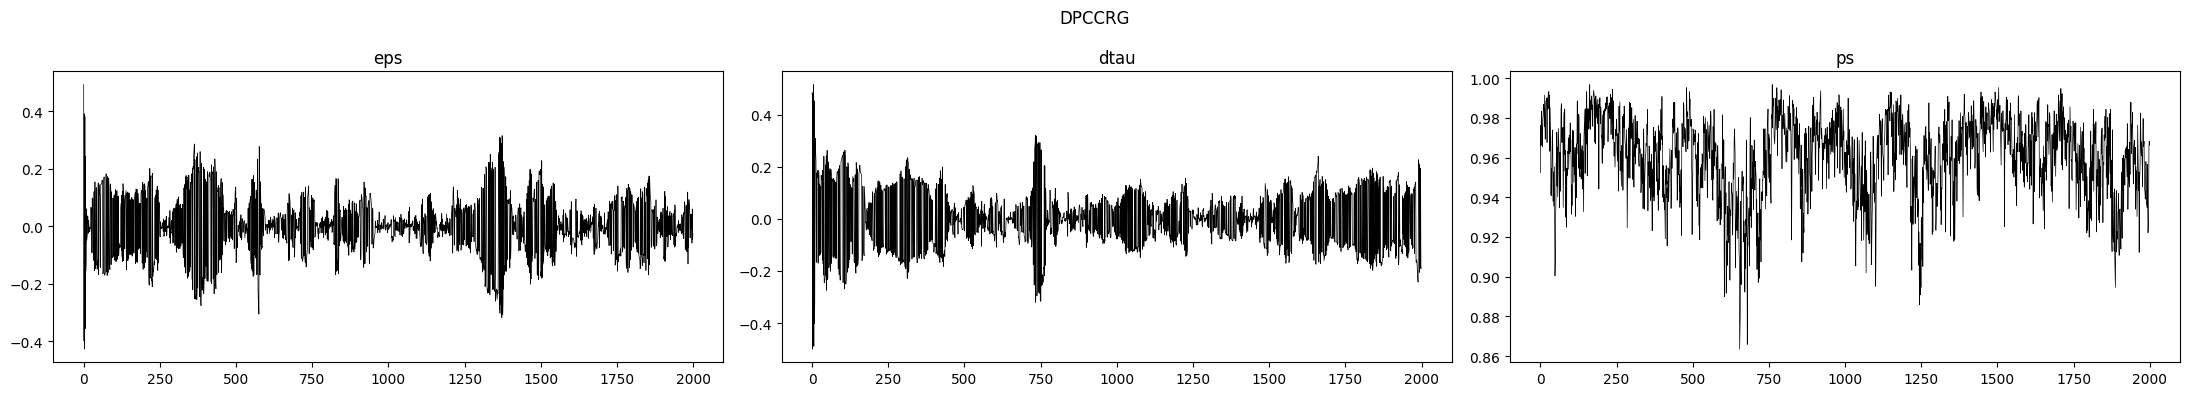

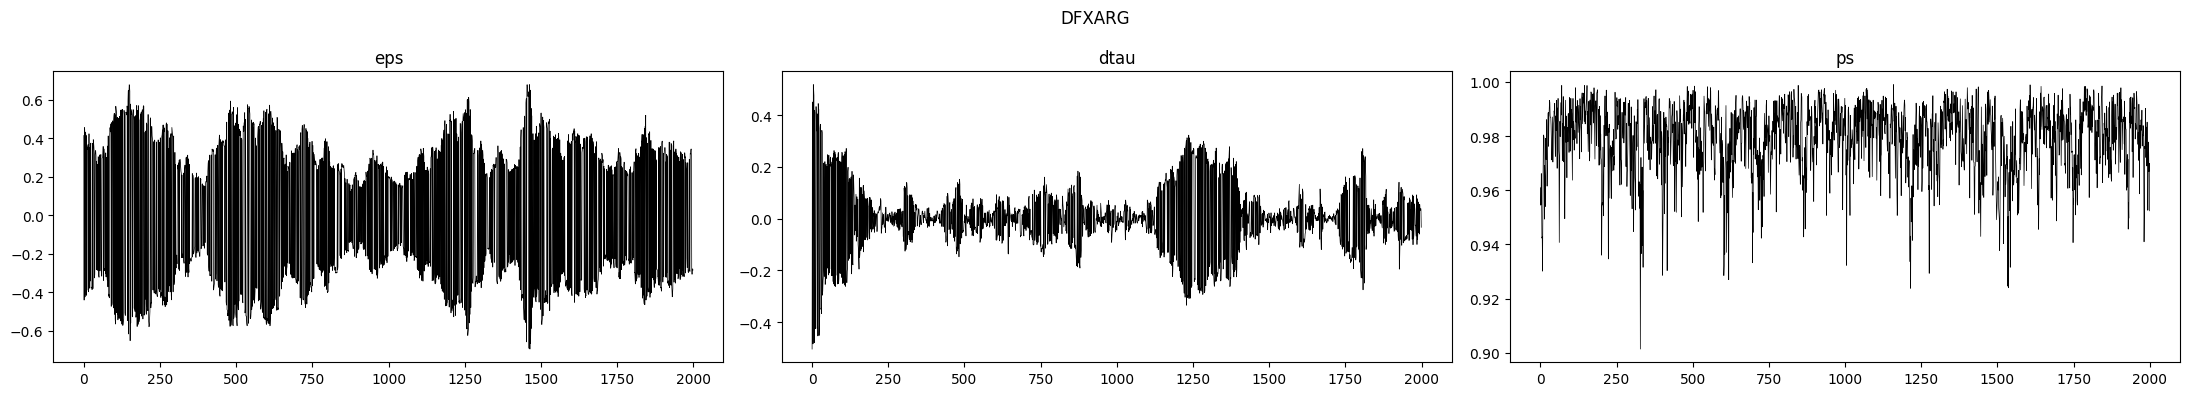

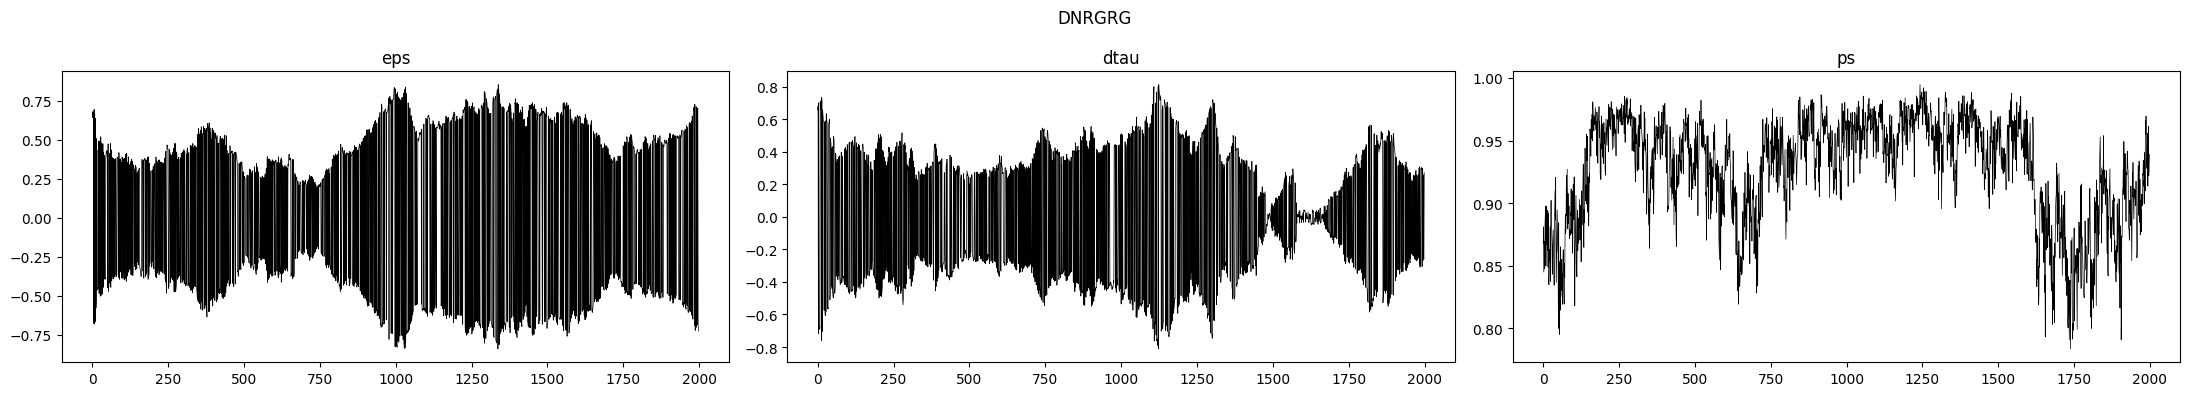

In [7]:
model.print_traceplot()